In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# 페이지 수 카테고리, 날짜를 입력값으로 받음
def make_urllist(page_num, code, date):
    urllist = []
    for i in range(1, page_num +1):
        url = 'https://news.naver.com/main/list.nhn?mode=LSD&mid=sec&sid1='+str(code)+'&date='+str(date)+'&page='+str(i)
        headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.90 Safari/537.36'}
        news = requests.get(url, headers=headers)
        
        # BeautifulSoup의 인스턴스 생성, 파서는 html.parser를 사용
        soup = BeautifulSoup(news.content, 'html.parser')

        news_list = soup.select('.newsflash_body .type06_headline li dl')
#         print(news_list)
        news_list.extend(soup.select('.newsflash_body .type06 li dl'))

        for line in news_list:
            urllist.append(line.a.get('href'))
        
    return urllist


In [2]:
url_list = make_urllist(2, 105, 20240110)
print('뉴스 기사의 개수:', len(url_list))

뉴스 기사의 개수: 40


In [3]:
url_list

['https://n.news.naver.com/mnews/article/092/0002317735?sid=105',
 'https://n.news.naver.com/mnews/article/119/0002788401?sid=105',
 'https://n.news.naver.com/mnews/article/442/0000168851?sid=105',
 'https://n.news.naver.com/mnews/article/056/0011639816?sid=105',
 'https://n.news.naver.com/mnews/article/030/0003172546?sid=105',
 'https://n.news.naver.com/mnews/article/092/0002317734?sid=105',
 'https://n.news.naver.com/mnews/article/092/0002317733?sid=105',
 'https://n.news.naver.com/mnews/article/056/0011639754?sid=105',
 'https://n.news.naver.com/mnews/article/056/0011639773?sid=105',
 'https://n.news.naver.com/mnews/article/032/0003272716?sid=105',
 'https://n.news.naver.com/mnews/article/366/0000961467?sid=105',
 'https://n.news.naver.com/mnews/article/009/0005242853?sid=105',
 'https://n.news.naver.com/mnews/article/011/0004285384?sid=105',
 'https://n.news.naver.com/mnews/article/020/0003541975?sid=105',
 'https://n.news.naver.com/mnews/article/056/0011639693?sid=105',
 'https://

In [4]:
from newspaper import Article

idx2word = {'101':'경제','102':'사회','103':'생활/문화','105':'IT/과학'}

# 입력값을 urllist 와 카테고리로 받음
def make_data(urllist, code):
    text_list = []
#     content_list = [] # 기사내용 저장 시간을 위해서 패스
    for url in urllist:
        article = Article(url, language='ko')
        article.download()
        article.parse()
        text_list.append(article.title)
#         content_list.append(article.text) # 기사내용 저장 시간을 위해서 패스
    
    # 'news'라는 열에 text_list를 추가하여 'content'열에 content_list를 추가하여 Dataframe 생성
#     df = pd.DataFrame({'news':text_list,'content':content_list})
    df = pd.DataFrame({'news':text_list})
    
    df['code'] = idx2word[str(code)]
    
    return df

In [5]:
data = make_data(url_list, 102)
data

,news,code
0,"레노버, 안드로이드·윈도 결합 씽크북 신제품 공개",사회
1,"과기정통부, 미국 CES서 디지털 청년인재 상호교류 마련",사회
2,"[뉴스] 파란 수국꽃 에디션? 커스텀 PC 맛집, 써멀테이크가 CES에 떴다",사회
3,"방심위 여권위원, 회의 중 야권위원 욕설에 임시회 소집…해촉 건의할 듯",사회
4,"네오드림스, CES에서 헬스케어 AI 코칭기기 'ArimoX' 선보여",사회
5,"테솔로, CES서 로봇 그리퍼 'DG-3F' 선봬",사회
6,첨단 소재·원격 협업·카테크서 활로 찾는 카메라 업체들,사회
7,"대전시, ‘CES 2024’에서 첫 단독 전시관 운영",사회
8,미국 ‘CES 2024’ 광주 전시관 개관…전남은 수출 계약,사회
9,"넥슨, 116억 과징금 맞고서야 시정 조치",사회


In [6]:
code_list = [101, 102, 103, 105]
code_list

[101, 102, 103, 105]

In [7]:
def make_total_data(page_num, code_list, date):
    df = None
    
    for code in code_list:
        url_list = make_urllist(page_num, code, date)
        df_temp = make_data(url_list, code)
        print(str(code)+"번 코드에 데이터를 만들었습니다.")
        
        
        if df is not None:
            df = pd.concat([df, df_temp]) 
        else:
            df = df_temp
            
    return df

In [8]:
# 데이터 생성
df = make_total_data(50, code_list, 20240110)

101번 코드에 데이터를 만들었습니다.
102번 코드에 데이터를 만들었습니다.
103번 코드에 데이터를 만들었습니다.
105번 코드에 데이터를 만들었습니다.


In [9]:
# page_num = [1,2,3,4,5]
# date = [20240101, 20240102, 20240103, 20240104]

# df_list = []

# for d in date:
#     for page in page_num:
#         df_temp = make_total_data(page, code_list, d)
#         df_list.append(df_temp)
# # for page in page_num:
# #     for d in date:
# #         df_temp = make_total_data(page, code_list, d)
# #         df_list.append(df_temp)


# df = pd.concat(df_list)

In [10]:
print('뉴스 기사의 개수: ', len(df))

뉴스 기사의 개수:  4000


In [11]:
df

,news,code
0,강원~울릉 연안여객선 이용객 7만여 명 감소,경제
1,지난달 강원 고용률 0.8%p 상승…실업률 0.5%p 하락,경제
2,"티웨이항공 여객기, 착륙 중 새와 충돌…""인명피해 없어""",경제
3,"티웨이항공 여객기, 인천공항 착륙 중 조류 충돌",경제
4,"티웨이항공 여객기, 인천공항 착륙 중 조류 충돌",경제
...,...,...
995,"삼성전자, 美 명물 스피어서 '갤럭시 언팩' 홍보",IT/과학
996,"스패로우, 중기부 이노비즈 인증 획득",IT/과학
997,"‘리니지W’, 日 사가현과 컬래버…‘사가현 탐험지’ 등장",IT/과학
998,"""LK-99, 초전도체 맞다""...공개 발표한 내용 [지금이뉴스]",IT/과학


In [12]:
import os

csv_path = os.getenv('HOME') + "/aiffel/aiffel_quest/quest_240111/news_data.csv"
df.to_csv(csv_path, index=False)

#파일이 있는지 없는지 확인 후 저장
if os.path.exists(csv_path):
    print('{} 파일 저장!'.format(csv_path))

/aiffel/aiffel/aiffel_quest/quest_240111/news_data.csv 파일 저장!


In [13]:
df = pd.read_csv(csv_path)
df

,news,code
0,강원~울릉 연안여객선 이용객 7만여 명 감소,경제
1,지난달 강원 고용률 0.8%p 상승…실업률 0.5%p 하락,경제
2,"티웨이항공 여객기, 착륙 중 새와 충돌…""인명피해 없어""",경제
3,"티웨이항공 여객기, 인천공항 착륙 중 조류 충돌",경제
4,"티웨이항공 여객기, 인천공항 착륙 중 조류 충돌",경제
...,...,...
3995,"삼성전자, 美 명물 스피어서 '갤럭시 언팩' 홍보",IT/과학
3996,"스패로우, 중기부 이노비즈 인증 획득",IT/과학
3997,"‘리니지W’, 日 사가현과 컬래버…‘사가현 탐험지’ 등장",IT/과학
3998,"""LK-99, 초전도체 맞다""...공개 발표한 내용 [지금이뉴스]",IT/과학


In [14]:
# 정규 표현식을 이용해서 한글 외의 문서는 전부 제거

df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['news']

/tmp/ipykernel_302/4053481844.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


0            강원울릉 연안여객선 이용객 만여 명 감소
1             지난달 강원 고용률  상승실업률  하락
2       티웨이항공 여객기 착륙 중 새와 충돌인명피해 없어
3         티웨이항공 여객기 인천공항 착륙 중 조류 충돌
4         티웨이항공 여객기 인천공항 착륙 중 조류 충돌
                   ...             
3995        삼성전자  명물 스피어서 갤럭시 언팩 홍보
3996            스패로우 중기부 이노비즈 인증 획득
3997        리니지  사가현과 컬래버사가현 탐험지 등장
3998         초전도체 맞다공개 발표한 내용 지금이뉴스
3999      현대차 슈퍼널  년 하늘 난다한미 동시 상용화
Name: news, Length: 4000, dtype: object

In [15]:
# 빈값 확인
print(df.isnull().sum())

news    4
code    0
dtype: int64


In [16]:
#중복 제거
df.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 개수: ', len(df))

뉴스 기사의 개수:  3530


<AxesSubplot:>

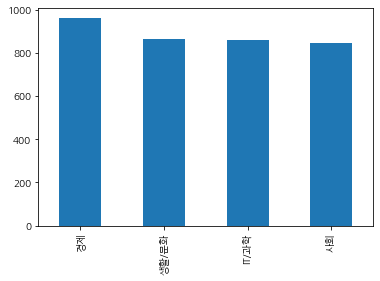

In [17]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "NanumGothic"

df['code'].value_counts().plot(kind = 'bar')

In [18]:
print(df.groupby('code').size().reset_index(name='count'))

    code  count
0  IT/과학    858
1     경제    960
2     사회    846
3  생활/문화    866


In [19]:
import pandas as pd
from konlpy.tag import Mecab

# Mecab 객체 생성
tokenizer = Mecab()

def preprocessing_t(data):
    text_data = []

    for sentence in data:
        #- 토큰화
        temp_data = tokenizer.morphs(sentence) 
        text_data.append(temp_data)

    text_data = list(map(' '.join, text_data))

    return text_data

In [20]:
text_data = preprocessing_t(df['news'])

NotImplementedError: Wrong number or type of arguments for overloaded function 'Tagger_parse'.
  Possible C/C++ prototypes are:
    MeCab::Tagger::parse(MeCab::Model const &,MeCab::Lattice *)
    MeCab::Tagger::parse(MeCab::Lattice *) const
    MeCab::Tagger::parse(char const *)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [ ]:
#- 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 2)

In [ ]:
print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

In [ ]:
#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
def tfidf_vectorizer(data):
    data_counts = count_vect.transform(data)
    data_tfidf = tfidf_transformer.transform(data_counts)
    return data_tfidf

In [ ]:
new_sent = preprocessing_t(["민주당 일각에서 법사위의 체계·자구 심사 기능을 없애야 한다는 \
                           주장이 나오는 데 대해 “체계·자구 심사가 법안 지연의 수단으로 \
                          쓰이는 것은 바람직하지 않다”면서도 “국회를 통과하는 법안 중 위헌\
                          법률이 1년에 10건 넘게 나온다. 그런데 체계·자구 심사까지 없애면 매우 위험하다”고 반박했다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

In [ ]:
new_sent = preprocessing_t(["인도 로맨틱 코미디 영화 <까립까립 싱글>(2017)을 봤을 때 나는 두 눈을 의심했다. \
                          저 사람이 남자 주인공이라고? 노안에 가까운 이목구비와 기름때로 뭉친 파마머리와, \
                          대충 툭툭 던지는 말투 등 전혀 로맨틱하지 않은 외모였다. 반감이 일면서 \
                          ‘난 외모지상주의자가 아니다’라고 자부했던 나에 대해 회의가 들었다.\
                           티브이를 꺼버릴까? 다른 걸 볼까? 그런데, 이상하다. 왜 이렇게 매력 있지? 개구리와\
                            같이 툭 불거진 눈망울 안에는 어떤 인도 배우에게서도 느끼지 못한 \
                            부드러움과 선량함, 무엇보다 슬픔이 있었다. 2시간 뒤 영화가 끝나고 나는 완전히 이 배우에게 빠졌다"])
print(clf.predict(tfidf_vectorizer(new_sent)))

In [ ]:
new_sent = preprocessing_t(["20분기 연속으로 적자에 시달리는 LG전자가 브랜드 이름부터 성능, 디자인까지 대대적인 변화를 \
                          적용한 LG 벨벳은 등장 전부터 온라인 커뮤니티를 뜨겁게 달궜다. 사용자들은 “디자인이 예쁘다”, \
                          “슬림하다”는 반응을 보이며 LG 벨벳에 대한 기대감을 드러냈다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

In [ ]:
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

## 불용어 추가하여 f1-score 확인

In [ ]:
stopwords = ["은", "는", "이", "가", "을", "를", "에", "의", "와", "과", "도", "로", "으로", "에서", "에게", "께", "한테", "랑", "부터", "까지", "마다", "대로", "쯤", "만큼", "처럼", "같이","그리고", "그러나", "하지만", "그런데", "따라서", "또는", "또", "그래서", "하지만", "왜냐하면",
            "있는", "있습니다", "하는", "합니다", "된", "됩니다", "했습니다", "하기", "해야", "될", "됨", "됐다", "했다", "이다", "이었다", "있다", "있었다", "있을", "있음", "있게", "되다", "되었다", "되어", "되어서", "되게", "하다", "하게", "하고", "하며", "하",
            "아", "어", "우", "으", "오", "이", "헉", "헐", "와", "우와", "오오", "아아"]
print(len(stopwords))

In [ ]:
# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수입니다.
def preprocessing(data):
    text_data = []

    for sentence in data:
        temp_data = []
        #- 토큰화
        temp_data = tokenizer.morphs(sentence) 
        #- 불용어 제거
        temp_data = [word for word in temp_data if not word in stopwords] 
        text_data.append(temp_data)

    text_data = list(map(' '.join, text_data))

    return text_data

In [ ]:
text_data = preprocessing(df['news'])
print(text_data[0])

In [ ]:
#- 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 2)

In [ ]:
print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

In [ ]:
#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
def tfidf_vectorizer(data):
    data_counts = count_vect.transform(data)
    data_tfidf = tfidf_transformer.transform(data_counts)
    return data_tfidf

In [ ]:
#불용어 추가했을 때
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

## 다른 날짜 추가  및 불용어 추가 하여 f1-score 확인

In [ ]:
# 다른 날짜 추가
df_temp = make_total_data(50, code_list, 20240109)
df = pd.concat([df, df_temp])

In [ ]:
df

In [ ]:
df.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 개수: ', len(df))

In [ ]:
text_data = preprocessing(df['news'])
print(text_data[0])

In [ ]:
#- 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 2)

In [ ]:
print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

In [ ]:
#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
def tfidf_vectorizer(data):
    data_counts = count_vect.transform(data)
    data_tfidf = tfidf_transformer.transform(data_counts)
    return data_tfidf

In [ ]:
#불용어 추가했을 때
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

## 형태소 분석기 변경해서 성능분석

In [ ]:
import time
from konlpy.tag import Hannanum, Kkma, Komoran, Okt
morphs_processors = [('Hannanm', Hannanum()), ('Kkma', Kkma()), ('Komoran', Komoran()), ('Okt', Okt())]

sentences = '밤에 귀가하던 여성에게 범죄를 시도한 대 남성이 구속됐다서울 제주경찰서는 \
            상해 혐의로 씨를 구속해 수사하고 있다고 일 밝혔다씨는 지난달 일 피해 여성을 \
            인근 지하철 역에서부터 따라가 폭행을 시도하려다가 도망간 혐의를 받는다피해 \
            여성이 저항하자 놀란 씨는 도망갔으며 신고를 받고 주변을 수색하던 경찰에 \
            체포됐다피해 여성은 이 과정에서 경미한 부상을 입은 것으로 전해졌다'


for name, morphs_processor in morphs_processors:
    strat_time = time.time()
    morphs = [morphs_processor.morphs(sentence) for sentence in sentences]                                          
    elapsed_time = time.time() - strat_time
    print('morphs_processor name = %20s, %.5f secs' % (name, elapsed_time))

### 회고
- 데이터가 늘어남에 따라서 f1 score는 좋아졌다.
- 불용어까지 제거를 하니 더 늘어났다.
- 뉴스기사 본문으로 하지 못해서 아쉬웠다.
- 각 형태소 분석기 성능비교하는걸 하지 못했다.
- 진행과정에서 헤매는 부분이 많아서 시간을 허비를 많이 했다.
- 코드 작성에도 좀 더 생각해야겠다.